<a href="https://colab.research.google.com/github/Iamanonymous19/Book-recommondation/blob/main/Assignment2_BT21MEC020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ASSINGMENT 2***

NAME :- Vishwesh Nitin Ingale

Roll no:- BT21MEC020


# ***CAMERA SPECIFICATIONS:-***

108MP wide camera

f/1.90.7μm, 9-in-1 binning into one large 2.1μm pixel

1/1.52” sensor size


# ***EXIF data:-***


f/1.89


1/520s

ISO50

5.89(Equivalent focal lengh 24mm)

# ***Code***

# Importing Libraries

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import median_filter, gaussian_filter, uniform_filter


# Image Reading and Pre-processing

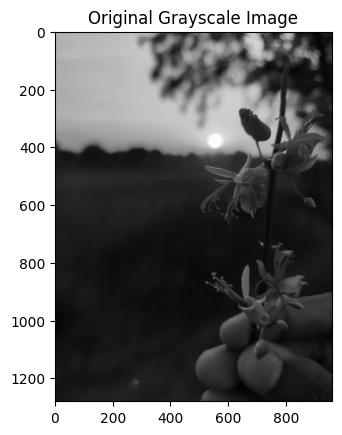

In [6]:
# Load an image
img = cv2.imread('your_image.jpg', cv2.IMREAD_GRAYSCALE)  # Replace 'your_image.jpg' with your actual image file path

# Convert to float32 and normalize
img = img.astype(np.float32) / 255.0

# Display the original grayscale image
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.show()

# Noise Addition

In [7]:
# Adding different types of noise

# Gaussian Noise
gaussian_noisy_img = random_noise(img, mode='gaussian', mean=0, var=0.01)

# Salt & Pepper Noise
sp_noisy_img = random_noise(img, mode='s&p', amount=0.02)

# Poisson Noise
poisson_noisy_img = random_noise(img, mode='poisson')

# Speckle Noise
speckle_noisy_img = random_noise(img, mode='speckle', var=0.04)

# Impulse Noise (using Salt & Pepper with a higher density)
impulse_noisy_img = random_noise(img, mode='s&p', amount=0.1)

# Periodic Noise
M, N = img.shape
x, y = np.meshgrid(np.arange(N), np.arange(M))
periodic_noise = np.sin(0.1 * x + 0.1 * y)
periodic_noisy_img = img + periodic_noise

# Quantization Noise
quant_levels = 16  # Example quantization level
quant_noisy_img = np.round(img * (quant_levels - 1)) * (1 / (quant_levels - 1))

# Filter Implementation and Display Results

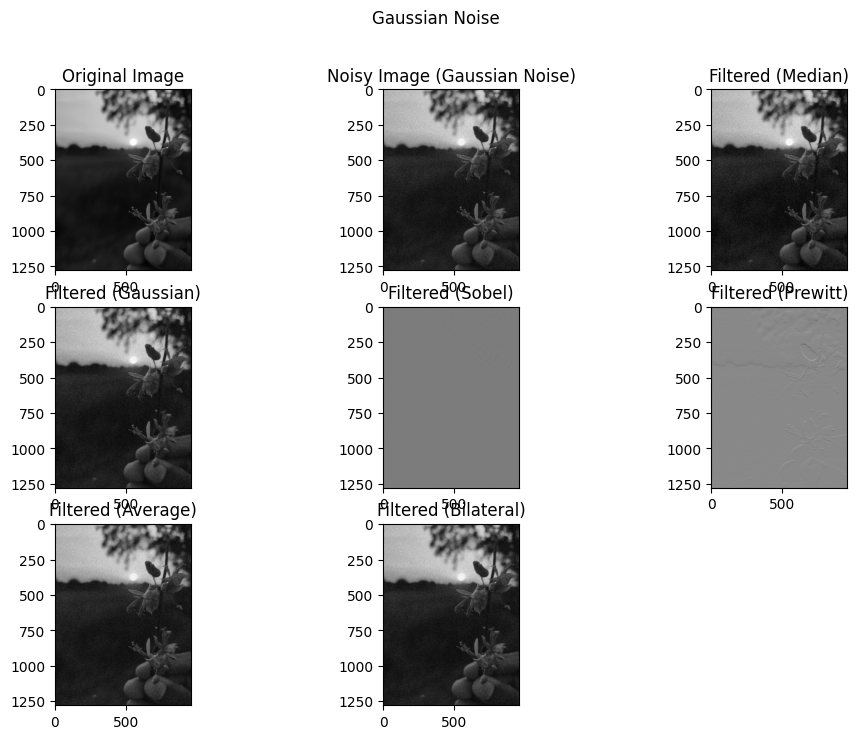

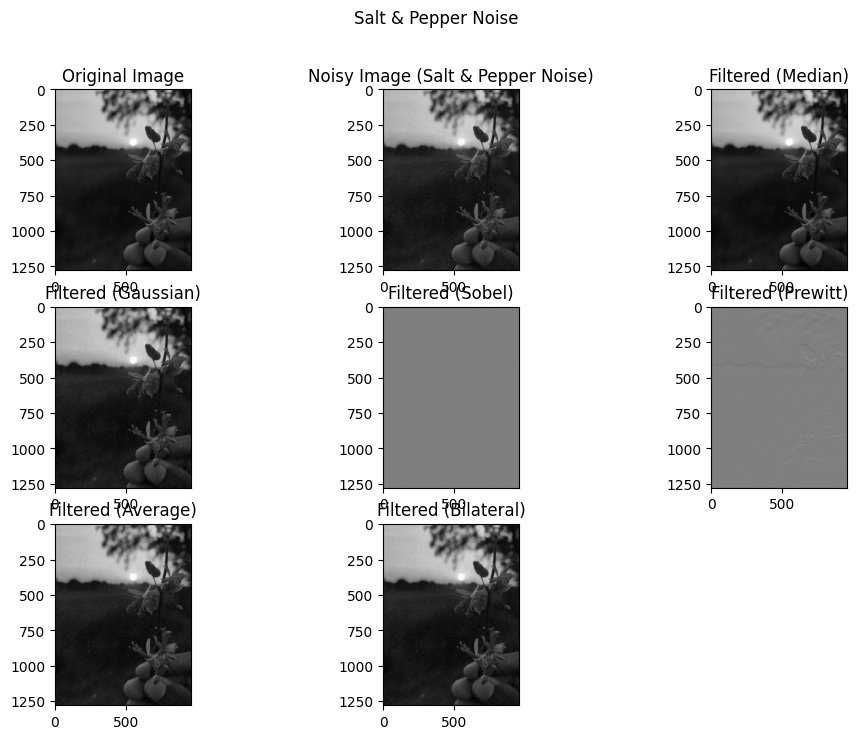

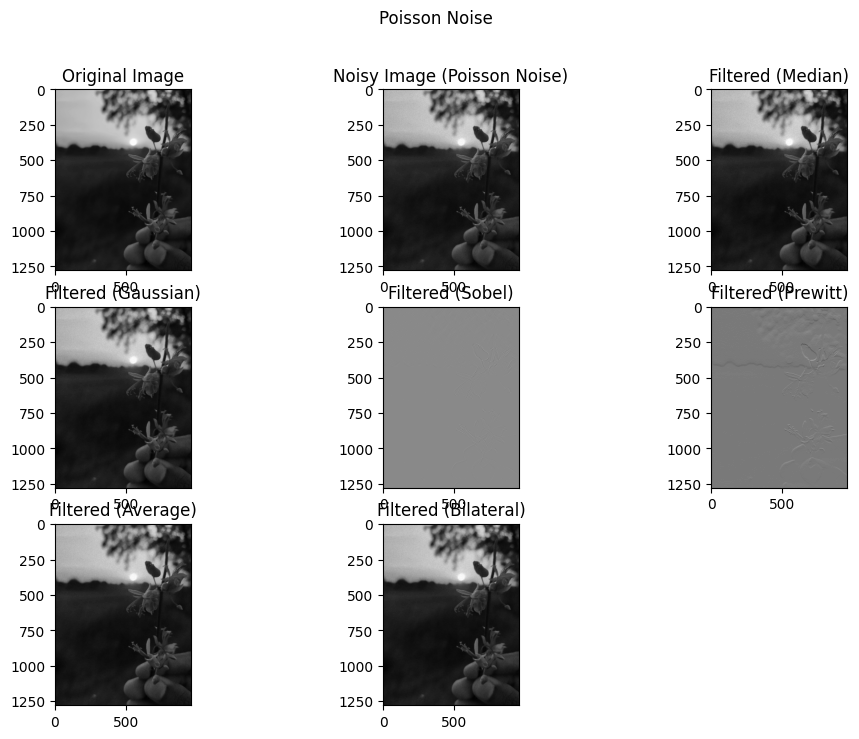

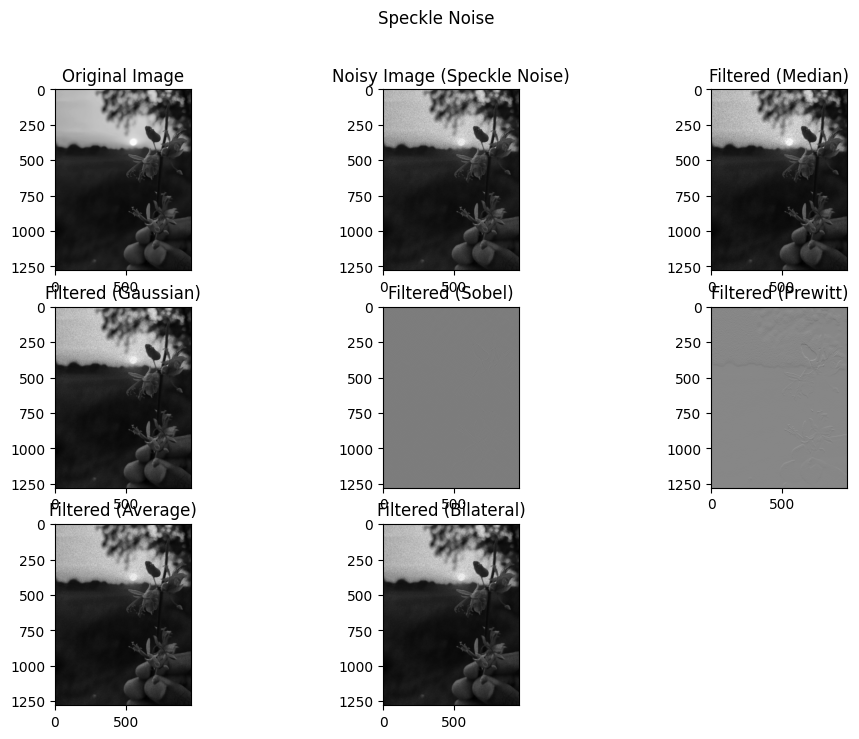

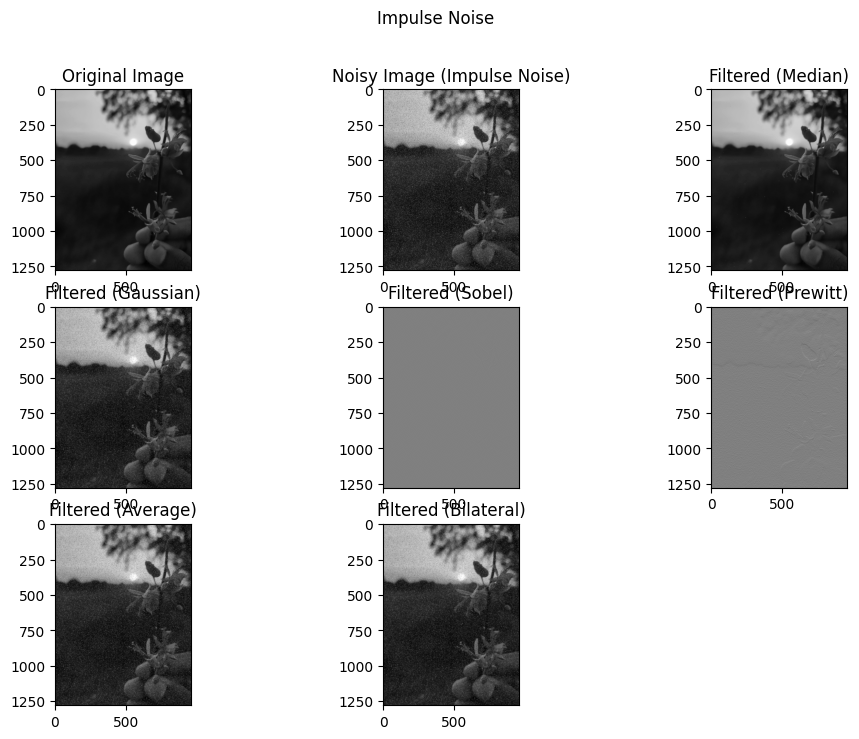

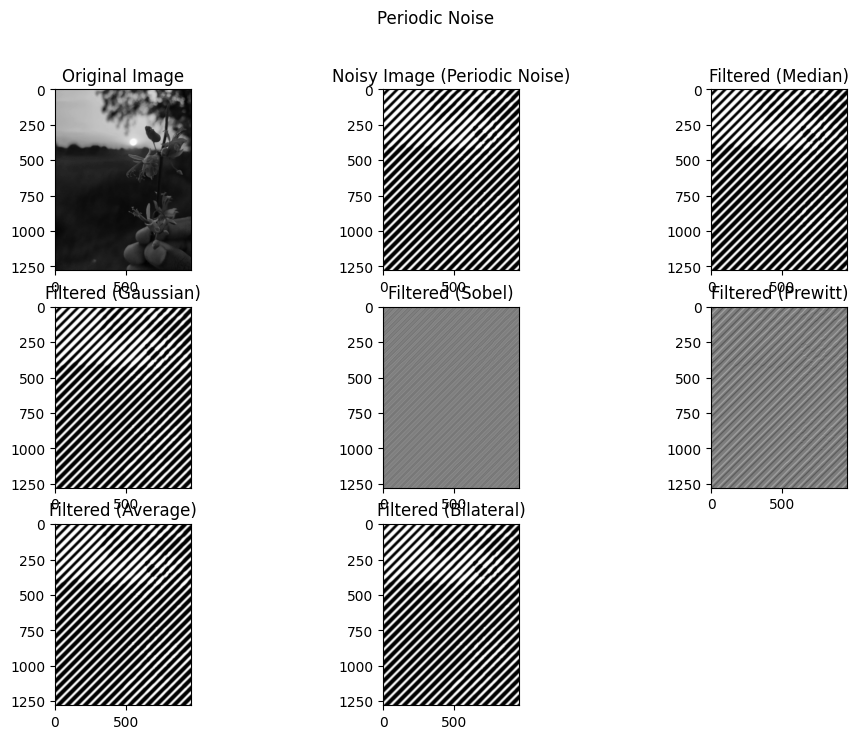

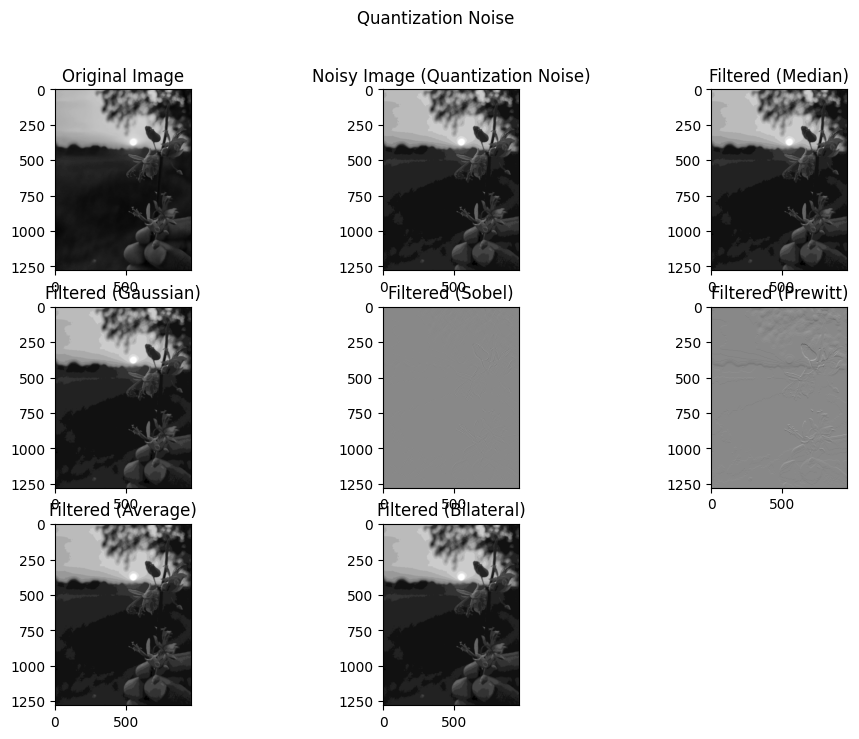

In [8]:
# Define filter parameters
median_filter_size = 3  # Median filter size
gaussian_sigma = 1      # Gaussian filter sigma

# Array of noisy images for easy iteration
noisy_images = [
    (gaussian_noisy_img, 'Gaussian Noise'),
    (sp_noisy_img, 'Salt & Pepper Noise'),
    (poisson_noisy_img, 'Poisson Noise'),
    (speckle_noisy_img, 'Speckle Noise'),
    (impulse_noisy_img, 'Impulse Noise'),
    (periodic_noisy_img, 'Periodic Noise'),
    (quant_noisy_img, 'Quantization Noise')
]

# Function to calculate MSE
def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

# Apply filters and display results for each noise type
for noisy_img, noise_type in noisy_images:

    # Convert noisy image to float32
    noisy_img = np.clip(noisy_img, 0, 1).astype(np.float32)

    # Apply filters
    filtered_img_median = median_filter(noisy_img, size=median_filter_size)
    filtered_img_gaussian = gaussian_filter(noisy_img, sigma=gaussian_sigma)
    filtered_img_average = uniform_filter(noisy_img, size=3)
    filtered_img_sobel = cv2.Sobel(noisy_img, cv2.CV_64F, 1, 1, ksize=3)
    filtered_img_prewitt = cv2.filter2D(noisy_img, -1, cv2.getDerivKernels(1, 0, 3)[0])
    filtered_img_bilateral = cv2.bilateralFilter(noisy_img, d=5, sigmaColor=75, sigmaSpace=75)

    # Display results
    plt.figure(figsize=(12, 8))
    plt.suptitle(noise_type)

    plt.subplot(3, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(3, 3, 2)
    plt.imshow(noisy_img, cmap='gray')
    plt.title(f'Noisy Image ({noise_type})')

    plt.subplot(3, 3, 3)
    plt.imshow(filtered_img_median, cmap='gray')
    plt.title('Filtered (Median)')

    plt.subplot(3, 3, 4)
    plt.imshow(filtered_img_gaussian, cmap='gray')
    plt.title('Filtered (Gaussian)')

    plt.subplot(3, 3, 5)
    plt.imshow(filtered_img_sobel, cmap='gray')
    plt.title('Filtered (Sobel)')

    plt.subplot(3, 3, 6)
    plt.imshow(filtered_img_prewitt, cmap='gray')
    plt.title('Filtered (Prewitt)')

    plt.subplot(3, 3, 7)
    plt.imshow(filtered_img_average, cmap='gray')
    plt.title('Filtered (Average)')

    plt.subplot(3, 3, 8)
    plt.imshow(filtered_img_bilateral, cmap='gray')
    plt.title('Filtered (Bilateral)')

    plt.show()

# Results and Analysis

In [ ]:
def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

# Define filter parameters
median_filter_size = 3  # Median filter size
gaussian_sigma = 1      # Gaussian filter sigma

# Array to store results
results = []

# Loop through each noisy image
for noisy_img, noise_type in noisy_images:

    # Convert noisy image to float32
    noisy_img = np.clip(noisy_img, 0, 1).astype(np.float32)

    # Apply filters
    filtered_imgs = [
        (median_filter(noisy_img, size=median_filter_size), 'Median'),
        (gaussian_filter(noisy_img, sigma=gaussian_sigma), 'Gaussian'),
        (cv2.Sobel(noisy_img, cv2.CV_64F, 1, 1, ksize=3), 'Sobel'),
        (cv2.filter2D(noisy_img, -1, cv2.getDerivKernels(1, 0, 3)[0]), 'Prewitt'),
        (uniform_filter(noisy_img, size=3), 'Average'),
        (cv2.bilateralFilter(noisy_img.astype(np.float32), d=5, sigmaColor=75, sigmaSpace=75), 'Bilateral')
    ]

    # Calculate and store metrics
    for filtered_img, filter_type in filtered_imgs:
        filtered_img = np.clip(filtered_img, 0, 1)
        psnr_value = psnr(img, filtered_img)
        ssim_value = ssim(img, filtered_img, data_range=filtered_img.max() - filtered_img.min())
        mse_value = mse(img, filtered_img)

        results.append({
            'Noise Type': noise_type,
            'Filter Type': filter_type,
            'PSNR': psnr_value,
            'SSIM': ssim_value,
            'MSE': mse_value
        })

#Print results in tabular form

In [10]:
# Print results in tabular form
print(f"{'Noise Type':<20} {'Filter Type':<15} {'PSNR':<10} {'SSIM':<10} {'MSE':<10}")
print("=" * 70)
for result in results:
    print(f"{result['Noise Type']:<20} {result['Filter Type']:<15} {result['PSNR']:<10.2f} {result['SSIM']:<10.2f} {result['MSE']:<10.4f}")


Noise Type           Filter Type     PSNR       SSIM       MSE       
Gaussian Noise       Median          27.80      0.45       0.0017    
Gaussian Noise       Gaussian        31.16      0.67       0.0008    
Gaussian Noise       Sobel           9.92       0.05       0.1018    
Gaussian Noise       Prewitt         9.78       0.04       0.1051    
Gaussian Noise       Average         29.89      0.59       0.0010    
Gaussian Noise       Bilateral       31.25      0.68       0.0008    
Salt & Pepper Noise  Median          49.08      1.00       0.0000    
Salt & Pepper Noise  Gaussian        31.86      0.76       0.0007    
Salt & Pepper Noise  Sobel           8.92       0.03       0.1283    
Salt & Pepper Noise  Prewitt         9.02       0.03       0.1253    
Salt & Pepper Noise  Average         30.58      0.71       0.0009    
Salt & Pepper Noise  Bilateral       31.95      0.76       0.0006    
Poisson Noise        Median          37.22      0.89       0.0002    
Poisson Noise       